# Sales Forecasting Model

In [2]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
import pickle
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# --- Data Loading and Preprocessing ---

# Load your data (replace 'train.csv' with your actual file name)
data = pd.read_csv("train.csv")  
data.head()

,date,store,item,sales
0,1/1/2019,1,1,13
1,2/1/2019,1,1,11
2,3/1/2019,1,1,14
3,4/1/2019,1,1,13
4,5/1/2019,1,1,10


In [5]:
data.tail()

,date,store,item,sales
182595,27/12/2023,10,10,72
182596,28/12/2023,10,10,81
182597,29/12/2023,10,10,69
182598,30/12/2023,10,10,86
182599,31/12/2023,10,10,67


# Preprocessing and Feature Engineering

In [6]:
# Preprocess your data (assuming dates are in DD/MM/YYYY format)
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y', errors='coerce')
data.dropna(subset=['date'], inplace=True) # Remove rows with missing dates

In [7]:
# Extract features from date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

In [8]:
# Separate features (X) and target variable (y)
X = data[['year', 'month', 'day', 'day_of_week', 'store', 'item']] 
y = data['sales']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale your features (optional but recommended for Random Forest)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Visualizations ---

C:\Users\REVELATION\AppData\Local\Temp\ipykernel_11128\1816383584.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


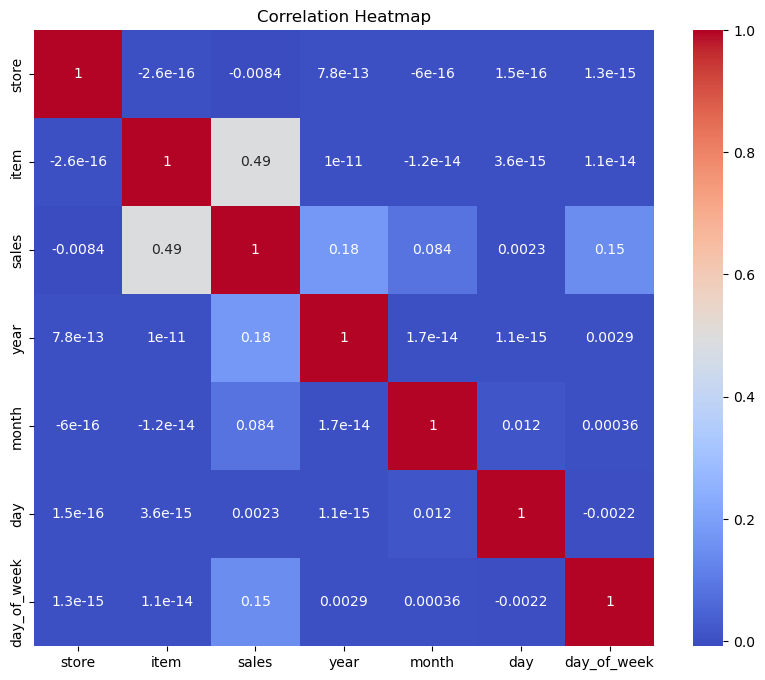

In [11]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

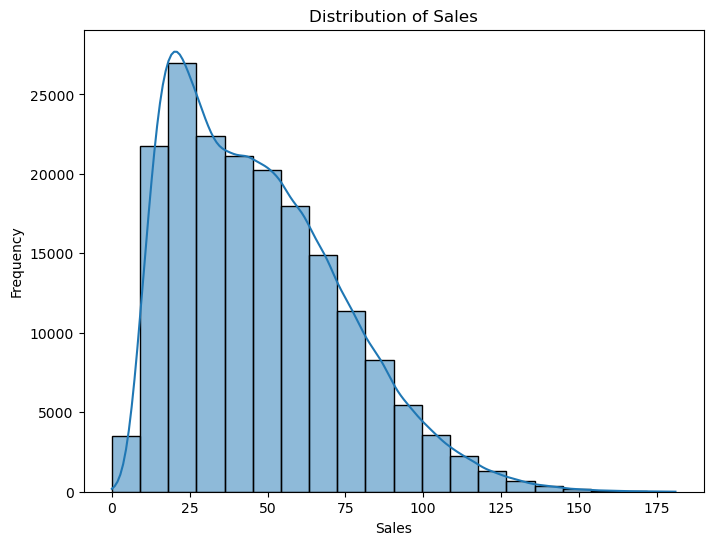

In [12]:
# 2. Sales Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['sales'], bins=20, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Hyper-parameter tuning

In [13]:
# --- GridSearchCV ---

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [14]:
# Create a Random Forest Regressor object
rf_model = RandomForestRegressor(random_state=42)

In [15]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

In [16]:
# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=5, min_samples_leaf=1, m

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   8.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  17.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  17.9s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  17.9s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  17.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  17.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   5.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=  

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   6.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  14.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  13.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  13.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  14.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  13.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  13.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  28.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  27.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  27.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  27.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  28.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total tim

[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  42.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  42.8s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  10.8s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  10.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  10.2s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  10.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=  10.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  20.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  2

# --- Model Training and Evaluation ---

In [17]:
Train the model with best parameters (already done in GridSearch)
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [18]:
# Evaluate the model's performance using multiple metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
median_ae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Median Absolute Error: {median_ae}")
print(f"R-squared: {r2}")
print(f"Explained Variance: {explained_variance}")

Mean Squared Error: 58.680706147850735
Root Mean Squared Error: 7.660333292217169
Mean Absolute Error: 5.8298160704494455
Median Absolute Error: 4.569603293360711
R-squared: 0.9204895105301985
Explained Variance: 0.9204896228019623


# --- Model Saving ---

In [19]:
# Save the model
filename = 'rf_model1.pkl' 
pickle.dump(best_model, open(filename, 'wb'))

In [20]:

# Load the saved best model
loaded_model = pickle.load(open(filename, 'rb'))

# --- Making Predictions---

In [ ]:
# Example prediction: 
#  - Assume you want to predict sales for item 1 on 2024-10-15
prediction_date = datetime(2024, 10, 15)
prediction_item = 1

# Create prediction DataFrame
prediction_data = pd.DataFrame({'date': [prediction_date]})
prediction_data['year'] = prediction_data['date'].dt.year
prediction_data['month'] = prediction_data['date'].dt.month
prediction_data['day'] = prediction_data['date'].dt.day
prediction_data['day_of_week'] = prediction_data['date'].dt.dayofweek
prediction_data['store'] = 1 # Assuming you want to forecast for store 1
prediction_data['item'] = prediction_item

# Scale the prediction data
scaled_data = scaler.transform(prediction_data[['year', 'month', 'day', 'day_of_week', 'store', 'item']])

In [21]:
--# Make prediction
predicted_sales = loaded_model.predict(scaled_data)[0]

print(f"Predicted Sales for item {prediction_item} on {prediction_date}: {predicted_sales}") 

Predicted Sales for item 1 on 2024-10-15 00:00:00: 19.094092842270097


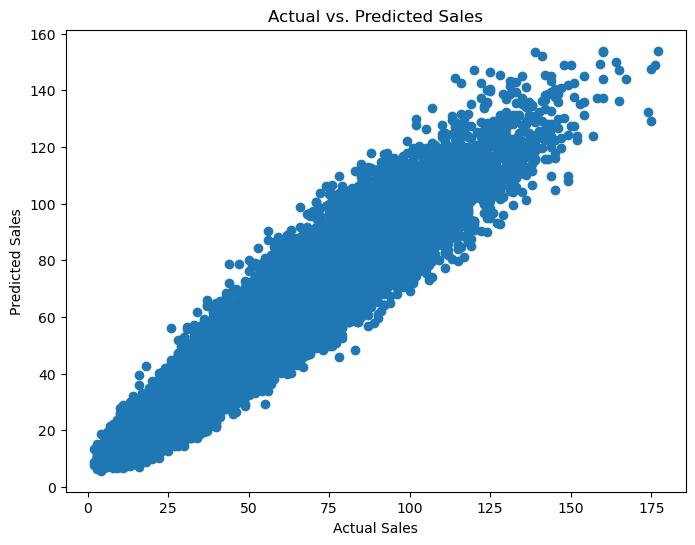

In [22]:
# --- Additional Visualizations (optional) ---

# 3. Actual vs. Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

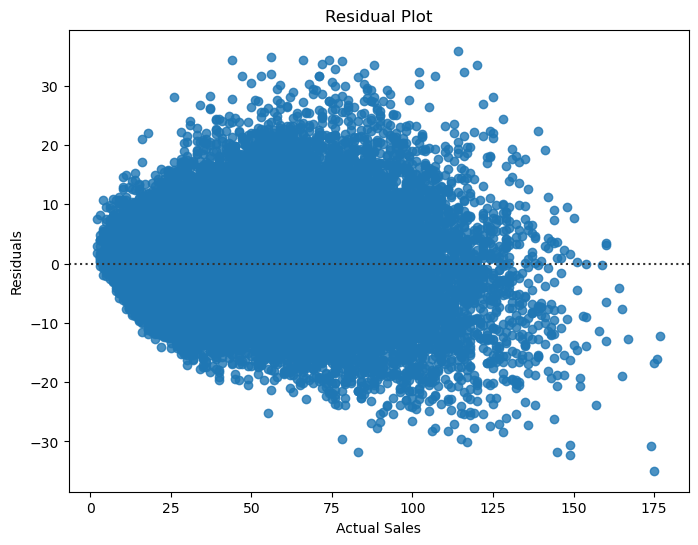

In [23]:
# 4. Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()